In [51]:
from Embedtest import OASDBDesc
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [48]:
#!pip install ablang

In [2]:
ls ../Desktop/

merck/


In [3]:
!pwd

/Users/cherylliu/Desktop/ds_discovery/MerckEDA-main/EmbedTest


In [4]:
!ls PATH_TO_GZ_FILE_IS

ls: PATH_TO_GZ_FILE_IS: No such file or directory


In [5]:
# obj_oasdb = OASDBDesc()
# big_df = obj_oasdb.read_data("/Users/cherylliu/Desktop/ds_discovery/datasets")

In [6]:
# sampled_df = big_df.sample(2000)
# sampled_df

In [7]:
#obj_oasdb.perform_random_sample(big_df, 10, 2000)

In [8]:
obj_oasdb = OASDBDesc()
sampled_df = pd.read_csv("/Users/cherylliu/Desktop/ds_discovery/sampled_df.csv")

In [41]:
sampled_df

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AGCAGCCTCCTGCAGG-1_contig_2,ATCATCCAACAGCCACATCCCTTCTCTACAGAAGCCTCTGAGAGGA...,H,F,T,F,T,F,T,IGHV1-46*01,...,404.0,GAA,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1,ACCCACTTCAGTCCCT-1_contig_1,GAGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCA...,H,F,T,F,T,F,T,IGHV3-30*02,...,381.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
2,ACGAGGAGTAGAAGGA-1_contig_1,ACATGGGAAGTGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAAC...,H,F,T,F,T,F,T,IGHV4-34*01,...,400.0,GA,2.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
3,ACACCGGCATGGTAGG-1_contig_1,AGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCAC...,H,F,T,F,T,F,T,IGHV3-48*03,...,395.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'A', '4 ...",|||||
4,GATCGATTCAAAGTAG-1_contig_1,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,379.0,C,1.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5,CGGAGTCTCGCCGTGA-1_contig_1,ATTCTTTTTTCTTTTCTGGGGATGCTTTCTGAGAGTCATGGATCTC...,H,F,T,F,T,F,T,IGHV4-39*01,...,411.0,C,1.0,NaN,NaN,CGGTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
6,GAGGTGATCAACACCA-1_contig_2,GGGATCACACAACAGCCACATCCCTCCCCTACAGAAGCCCCCAGAG...,H,F,T,F,T,F,T,IGHV1-24*01,...,391.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
7,CACAAACTCAATAAGG-1_contig_1,TGGGGCTTTCTGAGAGTCATGGACCTCCTGTGCAAGAACATGAAGC...,H,F,T,F,T,F,T,IGHV4-38-2*01,...,392.0,GAC,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
8,GATCGCGTCAGAGGTG-1_contig_2,AGCATCACGTAACAACCAGATTCCTCCTCTAAAGAAGCCCCTGGGA...,H,F,T,F,T,F,F,IGHV1-69*09,...,404.0,A,1.0,NaN,NaN,GTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
9,GCTTGAACACAGGAGT-1_contig_1,GGGGACTTTCTGAGACTCATGGACCTCCTGCACAAGAACATGAAAC...,H,F,T,F,T,F,T,IGHV4-4*07,...,395.0,GGGGCCTA,8.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||


In [9]:
heavy_chain = obj_oasdb.physchemvh_gen(sampled_df, "sequence_alignment_aa_heavy")

In [10]:
heavy_chain

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,7.0,2.0,4.0,4.0,4.0,14.0,3.0,3.0,5.0,8.0,...,15.0,13.0,10.0,4.0,8.0,32.0,15.0,42.0,22.0,-0.353913
1,8.0,4.0,6.0,4.0,4.0,17.0,1.0,3.0,6.0,9.0,...,15.0,8.0,11.0,5.0,12.0,35.0,20.0,39.0,25.0,-0.389565
2,7.0,2.0,3.0,3.0,3.0,12.0,3.0,4.0,5.0,10.0,...,19.0,9.0,8.0,5.0,10.0,32.0,15.0,41.0,18.0,-0.386087
3,8.0,2.0,5.0,5.0,3.0,13.0,0.0,3.0,4.0,10.0,...,17.0,6.0,9.0,3.0,9.0,33.0,14.0,36.0,19.0,-0.225217
4,7.0,2.0,7.0,3.0,4.0,12.0,1.0,2.0,5.0,6.0,...,12.0,12.0,10.0,4.0,9.0,29.0,16.0,40.0,23.0,-0.541739
5,7.0,2.0,2.0,6.0,4.0,11.0,0.0,4.0,2.0,12.0,...,23.0,11.0,6.0,6.0,5.0,33.0,13.0,48.0,18.0,-0.311304
6,8.0,2.0,6.0,8.0,2.0,13.0,1.0,1.0,6.0,7.0,...,11.0,14.0,12.0,3.0,10.0,30.0,18.0,40.0,25.0,-0.433913
7,6.0,2.0,3.0,3.0,2.0,11.0,1.0,5.0,5.0,10.0,...,20.0,12.0,10.0,4.0,9.0,33.0,13.0,42.0,14.0,-0.091304
8,9.0,4.0,4.0,5.0,3.0,11.0,2.0,4.0,6.0,5.0,...,19.0,9.0,13.0,3.0,7.0,34.0,13.0,46.0,25.0,-0.445217
9,6.0,2.0,4.0,3.0,2.0,14.0,2.0,5.0,5.0,9.0,...,19.0,11.0,10.0,5.0,7.0,32.0,15.0,45.0,20.0,-0.305217


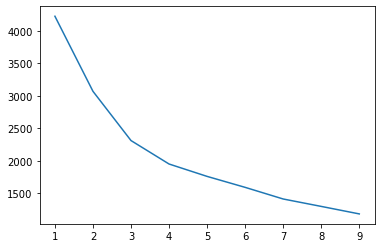

In [11]:
plt.plot(obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[1])

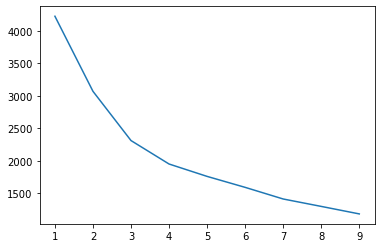

In [12]:
plt.plot(obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[1])

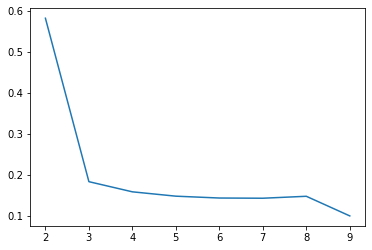

In [13]:
plt.plot(obj_oasdb.best_num_cluster_sil(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_sil(heavy_chain, 10)[1])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

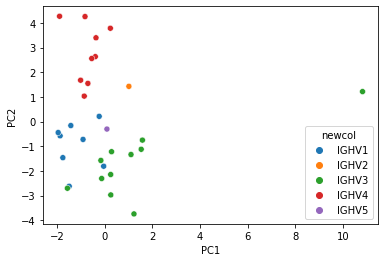

In [59]:
pca1 = obj_oasdb.pca_analysis(heavy_chain,sampled_df[['v_call_heavy']], 'v_call_heavy' )
sns.scatterplot(data = pca1, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

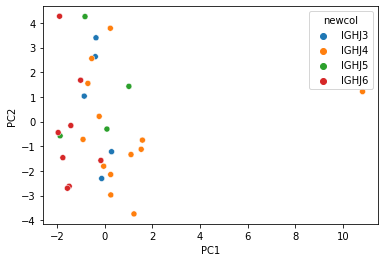

In [16]:
pca2 = obj_oasdb.pca_analysis(heavy_chain,sampled_df[['j_call_heavy']], 'j_call_heavy' )
sns.scatterplot(data = pca2, x = 'PC1', y = 'PC2', hue = 'newcol')

In [60]:
light_chain = obj_oasdb.physchemvh_gen(sampled_df, "sequence_alignment_aa_light")
light_chain.head()

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,8.0,2.0,4.0,5.0,4.0,9.0,0.0,4.0,4.0,10.0,...,14.0,9.0,4.0,2.0,6.0,30.0,8.0,35.0,19.0,-0.427826
1,8.0,2.0,4.0,2.0,5.0,9.0,0.0,6.0,4.0,7.0,...,18.0,9.0,4.0,2.0,4.0,30.0,7.0,41.0,14.0,-0.246087
2,9.0,2.0,1.0,5.0,4.0,9.0,0.0,5.0,3.0,7.0,...,15.0,10.0,5.0,2.0,5.0,30.0,8.0,40.0,15.0,-0.328696
3,7.0,2.0,4.0,3.0,2.0,14.0,1.0,2.0,5.0,6.0,...,19.0,8.0,8.0,1.0,7.0,25.0,9.0,39.0,16.0,-0.428696
4,4.0,2.0,4.0,5.0,5.0,8.0,2.0,6.0,7.0,8.0,...,18.0,11.0,5.0,1.0,4.0,28.0,5.0,40.0,20.0,-0.366087


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

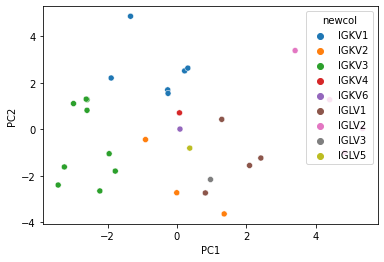

In [61]:
pca1_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = pca1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

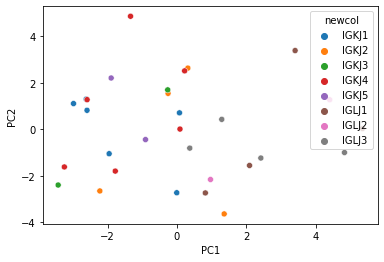

In [62]:
pca2_light = obj_oasdb.pca_analysis(light_chain,sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = pca2_light, x = 'PC1', y = 'PC2', hue = 'newcol')

In [53]:
#ablang_encode_seq
import ablang
seqs_light, seqs_heavy = obj_oasdb.ablang_encode_seq(sampled_df)

TypeError: ablang_encode_seq() missing 1 required positional argument: 'column'